<a href="https://colab.research.google.com/github/GbemisolaAyejuni/CIND820-Big-Data-Analytics-Project/blob/main/Sentiment_Analysis_with_TextBlob_and_Flair.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from sklearn.metrics import accuracy_score, matthews_corrcoef, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/reviews_cleanedtext_stars.csv')

In [ ]:
df.head()

,cleaned_text,stars
0,decide eat aware going take 2 hour beginning e...,3
1,family diner buffet eclectic assortment large ...,3
2,wow yummy different delicious favorite lamb cu...,5
3,cute interior owner gave u tour upcoming patio...,4
4,long term frequent customer establishment went...,1


In [ ]:
#Function to run TextBlob Sentiment Analysis
def get_sentiment_polarity(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # Polarity ranges from -1 (negative) to +1 (positive)

In [ ]:
df['polarity'] = df['cleaned_text'].apply(get_sentiment_polarity)

In [ ]:
df.head()

,cleaned_text,stars,polarity
0,decide eat aware going take 2 hour beginning e...,3,0.198485
1,family diner buffet eclectic assortment large ...,3,0.139935
2,wow yummy different delicious favorite lamb cu...,5,0.315152
3,cute interior owner gave u tour upcoming patio...,4,0.416234
4,long term frequent customer establishment went...,1,0.211111


In [ ]:
# Define a function to classify sentiment based on polarity
def classify_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['predicted_sentiment'] = df['polarity'].apply(classify_sentiment)

In [ ]:
df.head()

,cleaned_text,stars,polarity,predicted_sentiment
0,decide eat aware going take 2 hour beginning e...,3,0.198485,positive
1,family diner buffet eclectic assortment large ...,3,0.139935,positive
2,wow yummy different delicious favorite lamb cu...,5,0.315152,positive
3,cute interior owner gave u tour upcoming patio...,4,0.416234,positive
4,long term frequent customer establishment went...,1,0.211111,positive


In [ ]:
# Compare the predicted sentiment with star ratings
# Define a function to map star ratings to sentiment classes
def star_to_sentiment(star_rating):
    if star_rating >= 4:
        return 'positive'
    elif star_rating == 3:
        return 'neutral'
    else:
        return 'negative'


In [ ]:
# Create a new column with star-based sentiment
df['true_sentiment'] = df['stars'].apply(star_to_sentiment)

In [ ]:
# Display the first few rows with the new columns
print(df[['cleaned_text', 'stars', 'polarity', 'predicted_sentiment', 'true_sentiment']].head())

                                        cleaned_text  stars  polarity  \
0  decide eat aware going take 2 hour beginning e...      3  0.198485   
1  family diner buffet eclectic assortment large ...      3  0.139935   
2  wow yummy different delicious favorite lamb cu...      5  0.315152   
3  cute interior owner gave u tour upcoming patio...      4  0.416234   
4  long term frequent customer establishment went...      1  0.211111   

  predicted_sentiment true_sentiment  
0            positive        neutral  
1            positive        neutral  
2            positive       positive  
3            positive       positive  
4            positive       negative  


In [ ]:
# Save the DataFrame with sentiment analysis results to a new CSV
df.to_csv('reviews_textblob_polarity_cleaneddata.csv', index=False)


In [ ]:
# Generate metrics
y_true = df['true_sentiment']          # True sentiment labels based on star ratings
y_pred = df['predicted_sentiment']      # Predicted sentiment labels from TextBlob

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.71


In [ ]:
# Calculate Matthews Correlation Coefficient (MCC)
mcc = matthews_corrcoef(y_true, y_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")

Matthews Correlation Coefficient (MCC): 0.36


In [ ]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["positive", "neutral", "negative"]))



Classification Report:
              precision    recall  f1-score   support

    positive       0.86      0.26      0.40    970773
     neutral       0.17      0.23      0.20    542708
    negative       0.81      0.93      0.86   3206151

    accuracy                           0.71   4719632
   macro avg       0.61      0.47      0.49   4719632
weighted avg       0.74      0.71      0.69   4719632



In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred, labels=["positive", "neutral", "negative"])
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[2984912  201100   20139]
 [ 399432  123941   19335]
 [ 318297  403004  249472]]


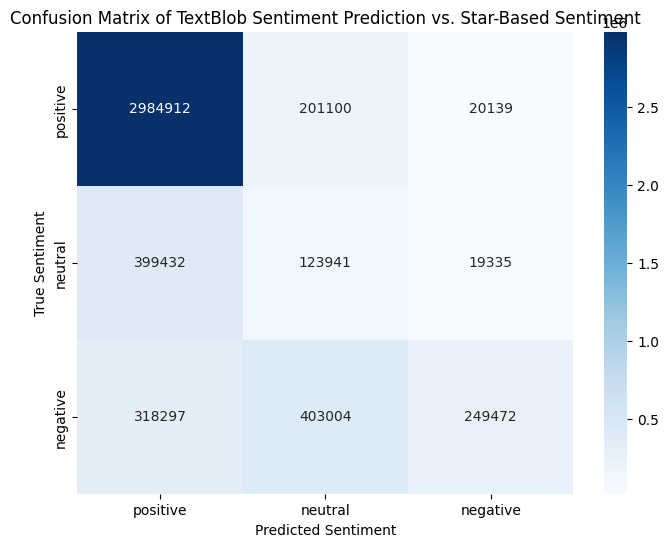

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.title("Confusion Matrix of TextBlob Sentiment Prediction vs. Star-Based Sentiment")
plt.show()

# Using Original Reviews Text

In [ ]:
df2 = pd.read_csv('/content/reviews_text_stars.zip')
df2['polarity'] = df2['text'].apply(get_sentiment_polarity)
df2['predicted_sentiment'] = df2['polarity'].apply(classify_sentiment)
df2['true_sentiment'] = df2['stars'].apply(star_to_sentiment)


In [ ]:
print(df2[['text', 'stars', 'polarity', 'predicted_sentiment', 'true_sentiment']].head())
df2.to_csv('reviews_textblob_polarity_originaldata.csv', index=False)

                                                text  stars  polarity  \
0  if you decide to eat here just be aware it is ...      3  0.085278   
1  family diner had the buffet eclectic assortmen...      3  0.139935   
2  wow  yummy different  delicious   our favorite...      5  0.279545   
3  cute interior and owner  gave us tour of upcom...      4  0.392041   
4  i am a long term frequent customer of this est...      1  0.211111   

  predicted_sentiment true_sentiment  
0             neutral        neutral  
1            positive        neutral  
2            positive       positive  
3            positive       positive  
4            positive       negative  


In [ ]:
# Generate metrics
y2_true = df2['true_sentiment']          # True sentiment labels based on star ratings
y2_pred = df2['predicted_sentiment']      # Predicted sentiment labels from TextBlob

# Calculate accuracy
accuracy2 = accuracy_score(y2_true, y2_pred)
print(f"Accuracy: {accuracy2:.2f}")

Accuracy: 0.71


In [ ]:
# Calculate Matthews Correlation Coefficient (MCC)
mcc2 = matthews_corrcoef(y2_true, y2_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc2:.2f}")

Matthews Correlation Coefficient (MCC): 0.37


In [ ]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y2_true, y2_pred, target_names=["positive", "neutral", "negative"]))



Classification Report:
              precision    recall  f1-score   support

    positive       0.87      0.26      0.40    970773
     neutral       0.17      0.25      0.21    542708
    negative       0.82      0.93      0.87   3206151

    accuracy                           0.71   4719632
   macro avg       0.62      0.48      0.49   4719632
weighted avg       0.76      0.71      0.70   4719632



In [ ]:
# Generate confusion matrix
conf_matrix2 = confusion_matrix(y2_true, y2_pred, labels=["positive", "neutral", "negative"])
print(conf_matrix2)

[[2977727  210295   18129]
 [ 386624  137455   18629]
 [ 272689  443064  255020]]


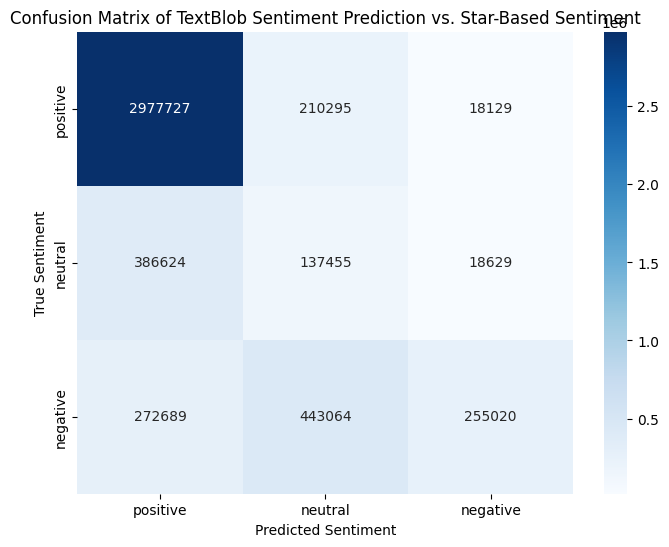

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "neutral", "negative"],
            yticklabels=["positive", "neutral", "negative"])
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.title("Confusion Matrix of TextBlob Sentiment Prediction vs. Star-Based Sentiment")
plt.show()

# Sentiment Analysis Using Flair

In [ ]:
!pip install flair

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 111.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.6/82.6 kB 7.3 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=ab1777216ecad4d178984d7f69d5ad9680a6c8310dabfc66c1c01929c50bb35a
  Stored in directory: /root/.cac

In [ ]:
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
dfFlair = pd.read_csv('/content/reviews_text_stars.zip')

In [ ]:
# Load Flair's pre-trained sentiment analysis model
classifier = TextClassifier.load('en-sentiment')

# Define a function to use Flair for sentiment analysis
def get_flair_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    # Get the predicted label (POSITIVE or NEGATIVE) and convert to our labels
    label = sentence.labels[0].value
    if label == 'POSITIVE':
        return 'positive'
    else:
        return 'negative'



2024-11-14 17:14:02,312 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpr5xrpvs9


100%|██████████| 253M/253M [00:12<00:00, 21.1MB/s]

2024-11-14 17:14:15,245 copying /tmp/tmpr5xrpvs9 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2024-11-14 17:14:15,458 removing temp file /tmp/tmpr5xrpvs9


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# Apply Flair sentiment analysis on the 'reviews' column
dfFlair['predicted_sentiment'] = dfFlair['text'].apply(get_flair_sentiment)

                                                text  stars  \
0  if you decide to eat here just be aware it is ...      3   
1  family diner had the buffet eclectic assortmen...      3   
2  wow  yummy different  delicious   our favorite...      5   
3  cute interior and owner  gave us tour of upcom...      4   
4  i am a long term frequent customer of this est...      1   

  predicted_sentiment true_sentiment  
0            negative       negative  
1            positive       negative  
2            positive       positive  
3            positive       positive  
4            negative       negative  
Accuracy: 0.90
Matthews Correlation Coefficient (MCC): 0.78

Classification Report:
              precision    recall  f1-score   support

    positive       0.81      0.89      0.85   1513481
    negative       0.95      0.90      0.92   3206151

    accuracy                           0.90   4719632
   macro avg       0.88      0.90      0.89   4719632
weighted avg       0.90      0.

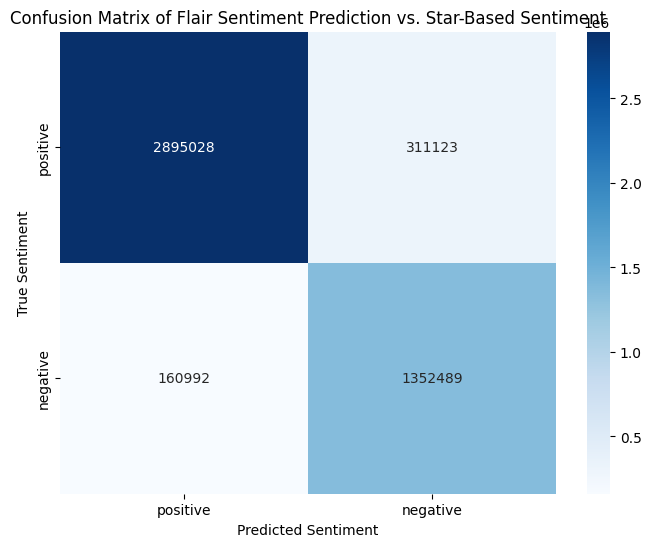

In [ ]:


# Define a function to map star ratings to sentiment classes (ground truth)
def star_to_sentiment(star_rating):
    if star_rating >= 4:
        return 'positive'
    else:
        return 'negative'  # Treat 1, 2, and 3 stars as negative

# Create a new column with star-based sentiment (ground truth)
dfFlair['true_sentiment'] = dfFlair['stars'].apply(star_to_sentiment)

# Display the first few rows with predicted and true sentiment columns
print(dfFlair[['text', 'stars', 'predicted_sentiment', 'true_sentiment']].head())

# Generate metrics
yflair_true = dfFlair['true_sentiment']          # True sentiment labels based on star ratings
yflair_pred = dfFlair['predicted_sentiment']      # Predicted sentiment labels from Flair

# Calculate accuracy
accuracy_flair = accuracy_score(yflair_true, yflair_pred)
print(f"Accuracy: {accuracy_flair:.2f}")

# Calculate Matthews Correlation Coefficient (MCC)
mcc_flair = matthews_corrcoef(yflair_true, yflair_pred)
print(f"Matthews Correlation Coefficient (MCC): {mcc_flair:.2f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(yflair_true, yflair_pred, target_names=["positive", "negative"]))

# Generate confusion matrix
conf_matrix_flair = confusion_matrix(yflair_true, yflair_pred, labels=["positive", "negative"])

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_flair, annot=True, fmt="d", cmap="Blues", xticklabels=["positive", "negative"],
            yticklabels=["positive", "negative"])
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.title("Confusion Matrix of Flair Sentiment Prediction vs. Star-Based Sentiment")
plt.show()